<div class="alert alert-info" role="alert">
    <center><h1 style="color:red;"><strong><font color = red>Prescriptive Analytics:<br>Taking Analytics to the Next Level</font></strong></h1></center><br>
</div>
<br>

Dave Wentzel  
[https://github.com/davew-msft/PrescriptiveAnalytics](https://github.com/davew-msft/PrescriptiveAnalytics)  
[My LinkedIn Profile](linkedin.com/in/dwentzel)  
Decision Architect  
Microsoft Technology Center   
Philadelphia PA  

## Standard Jupyter Notebook Setup

You might want to ensure this notebook executes in the context of the `devcontainer` in vscode to ensure the python environments, packages, etc are set up _perfectly_.  


In [5]:
%run ./scripts/imports.py
%run ./scripts/utils.py


done running imports.py
done running utils.py


# Prescriptive Analytics Methods

**_How can we, as data professionals, help to inform decision makers about what actions (decisions) they should take?_**

![](./slides/Prescriptive.png)

## Positive vs Normative Statements

**Positive statements** are based on empirical evidence, can be tested, and involve **NO VALUE JUDGMENTS**. Positive statements contain no indication of approval or disapproval.  We don't value judge, we merely state the facts.  

**Normative statements** are when values and opinions start to come into the analysis.  Normative statements express a judgment about what _ought to be_.  

[Link to wikipedia article](https://en.wikipedia.org/wiki/Positive_statement).  

_Who cares?_

Generally, data analysts stick with _positive_ statements.  We shy away from ever making normative statements.  We live in the realm of _positive statements_.  Our statements are based on data, statistics, math, machine learning, linear programming, and _possibly_ econometrics.  

But, business people and executives want more out of the data.  _Tell me what to do next?_.  What are the most reasonable courses of actions and their _implications and ramifications_ (I&R) for the **ENTIRE** BUSINESS.  These are normative statements about what _should be _ done.  

* A business is a _complex system_.  
  * A _complex system_ is a system composed of many interacting parts, such that the collective behavior of those parts together is more than the sum of the individual behaviors.  
* A few examples:
  * Customer Lifetime Value calculations
  * "If we increase sales by 5%..."
  * demand pricing/price optimization
* In a complex system, if we make a decision about one part it will have impacts (I&R) for other parts...possibly undesirable.  
  * What appear to be _Narrow Impacts_ tend to actually have _Broad Impacts_, and executives want to know what they _should_ do.  

**It is not OUR JOB as analysts to give normative answers to executives, it is our job to help them understand the data and business problem to a degress where we can _help_ the executive understand the normative statements that our data is trying to show them.**


One last example:  

We sell solutions to B2B customers.  We have teams of sales people, account managers, tech support...all for the purpose of managing our clients.  What should be the composition of the team?  

Predictive analytics _could_ tell us the probability of the sale.  

What normally happens is that the sales teams will focus on those customers with the highest probability of converting.  

Prescriptive analytics might tell us what the teams should look like to make the sale and handle the entire customer lifecycle.  

_The Nope List_


## The _Hows_ of Prescriptive Analytics

First, there is no universally-accepted definition of Prescriptive Analytics.  You may hear it called:
* Exploratory Data Analytics (EDA)
* Data Profiling
* Data Sandboxing

We use whatever technique and tool that we are comfortable using to solve the problem.  
![](./slides/ppp.png)

Possible tools:
* ML/AI/Neural Networks
* SQL(-based analytics)
* Math (Excel/regression)
* python/R/SAS/MATLAB/SPSS
* Simulations (monte carlo or otherwise)
  * great when you have _uncertain_ inputs
* Modeling
* Linear Programming
* Rules-based systems (expert systems, state machines, etc)
* INTUITION

The tools/methods are often _complementary_ but don't think you MUST use each of these tools or have experts in each.  A little knowledge about each is enough.  Some examples:

* if I don't have folks that understand monte carlo sims
* if I don't have folks that understand Linear Programming

Regardless of tool, we always need data.  But is more data always better?  





## Simulations

I wish I had time to cover this in detail.  Key points:

* Simulations are time-consuming and difficult to create.  
* Even with enough time you risk not being able to model all possibilities (or even interesting possibilities)
* Discrete-event simulation (DES) ...
  * events happen at specific times and we can model them
* ...vs continuous simulations
  * events occur continuously and with different throughput between time units
  * events occur individually at random moments, but collectively occur at an average rate per unit time.  

Sometimes we can actually take existing event data and use that as the basis for a simulation.  



_Some examples:..._
* dwell analytics
  * what is the average time a customer spends in _the system_?
  * avg time a customer spends waiting in line 
  * time-average number of customers on the system
  * time-average number of customer waiting in line
  * how long does fulfillment take?  
  * _doordash_
* Queueing Theory
  * customers waiting in line
  * stages in order fulfillment
  * manufacturing lines
  * Black Friday online sales

_Who cares?_

Let's say we do some research (maybe an A/B Test) on price elasticity and we determine that a 5% decrease in price should stimulate orders.  But fulfillment becomes an issue as customers have to wait for their order (the queue), resulting in dissatisfied customers that ULTIMATELY causes a HUGE uptick in customer churn.  


## A Marketing Problem that is Really a Queueing Problem (Dwell Analytics)



Let's say consumers come into your brick-and-mortar electronics store called _Best By Price_ looking for a product that they've done some initial research on using online retailers.  You've done your research and you determine _price_ is a key factor influencing their purchase with _immediate gratification_ being the next most important factor (ie, if the price differential isn't _too much_ they are willing to pay more NOW to get instant fulfillment vs waiting for 2 day shipping).  

We know using econometrics that if the price is lower we should get a lot of shoppers to the store.  Using Queueing Theory and past historical shopping data we should be able to "model" things like the `mean time between arrivals` and the `mean arrival rate`.  The `arrival rate` becomes a function of price.  

If we set the price too high it will shift the supply/demand curve to the right, causing the probabilities of events to change.  Namely, the inter-arrival times should rise.  This is a simple reduction in demand.  The higher price should spread out the time between customer arrivals.  _What are some cases where this would be helpful?_

_You could say we are using econometrics to determine price optimization in this use case.  Price Optimization is one of the most challenging topics in data analytics today.  The above is not the only way to model this, but it's certainly a standard approach._

Understanding this "complex system" has tons of other benefits to a retailer...the above isn't even, frankly, the most interesting benefit.  

Let's look at how we MIGHT model this in code, without introducing historical data, quantity-on-hand, shelf-outs and stock-outs, will the customer get fed up waiting in-line and go elsewhere, etc.    

In [2]:
##
## Set queue hyperparameters
## https://medium.com/analytics-vidhya/simulating-a-single-server-queuing-system-in-python-f8e32578749f
## 
average_arrival_interval = 5                ## 5 minutes per arrival.  A new shopper arrives every 5 mins
arrival_lambd = 1/average_arrival_interval  ## number of arrivals per minute 
##
average_service_time = 3                    ## 3 minutes per service.  ie, a salesperson takes, on avg, 3 minutes servicing a customer
service_lambd = 1/average_service_time      ## number served per minute
##
## Number of events (ie, number of customers serviced)
##
n_events = 30

In [6]:
##
## Import queueing functions
## Functions are:
##   1. ts_update: a timing utility
##   2. queue_run: the main function 
##   3. queue_summary: a summary function
##
%run ./scripts/queue

In [7]:
##
## Run one queue function for seed = 42 
## I hope you know why I chose 42

queue = queue_run( arrival_lambd, service_lambd, n_events, seed = 42 )
##
## Summarize results
##
printbold( 'Queue Data\n' )
display( queue.head() )
x = queue_summary( queue )
printbold( '\n\nQueue Summary\n' )
display( x.head() )
printbold( f'\n\nQueue Statistics\n' )
cols = [ 'time in queue', 'time in server', 'time in system' ]
x[ cols ].describe()

Queue Data



,event,time,type,arrived_customer,served_customer,departed_customer,queue
0,1,1.147211,arrival,1,1,0,0
1,2,4.082020,arrival,2,0,0,1
2,3,5.162485,departure,0,2,1,0
3,4,7.496038,departure,0,0,2,0
4,5,9.307628,arrival,3,3,0,0




Queue Summary



,customer,arrival time,serving time,departure time,time in queue,time in server,time in system
0,1,1.15,1.15,5.16,0.00,4.02,4.02
1,2,4.08,5.16,7.50,1.08,2.33,3.41
2,3,9.31,9.31,10.29,0.00,0.98,0.98
3,4,10.60,10.60,11.23,0.00,0.63,0.63
4,5,20.13,20.13,20.19,0.00,0.06,0.06




Queue Statistics



,time in queue,time in server,time in system
count,15.000000,15.000000,15.000000
mean,0.506000,2.502000,3.008000
std,0.940629,2.756168,2.673949
min,0.000000,0.060000,0.060000
25%,0.000000,0.720000,0.805000
50%,0.000000,1.420000,3.170000
75%,0.540000,3.270000,3.820000
max,2.810000,8.600000,8.600000


What is this data trying to tell us?  

`Queue Data` shows us the event history times which may be helpful to see the customer journey and is great for later simulations.  

![](./slides/q1.png)

`Queue Summary` and `Queue Statistics` shows us important stats

![](./slides/q2.png)


What I really want to do is run this "simulation" a large number of times to see if I can learn anything and offer a **Next Best Action** solution to my business users.  


,run number,time in queue,time in server,time in system
0,1,0.482000,2.553333,3.035333
1,2,1.416667,2.870000,4.286667
2,3,1.141333,2.281333,3.422667
3,4,0.515333,1.713333,2.228000
4,5,6.373333,4.188667,10.562000


Text(0.5, 1.0, 'Time in Queue\nvs.\\Time in Queue')

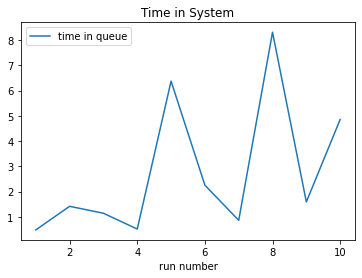

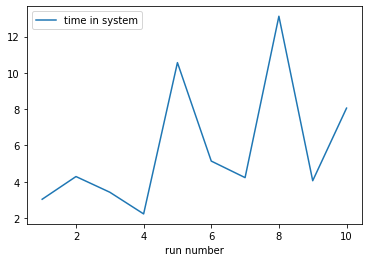

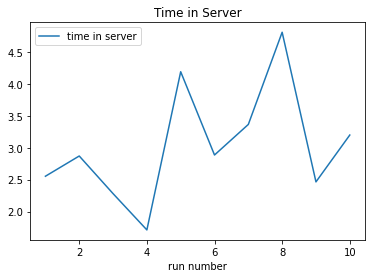

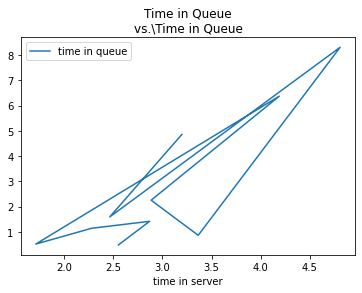

In [8]:
##
## Define a run experiment function
##
def run_experiments( n_runs = 50 ):
    df = pd.DataFrame( columns = [ 'time in queue', 'time in server', 'time in system' ] )
    cols = list( df )
    for i in range( n_runs ):
        queue = queue_run( arrival_lambd, service_lambd, n_events, seed = i )
        x = queue_summary( queue )
        means = x[ cols ].describe().loc['mean']
        df = df.append( means )
    df.reset_index( inplace = True, drop = True )
    df[ 'run number' ] = range( 1, n_runs + 1 )
    df = df[ [ 'run number', 'time in queue', 'time in server', 'time in system' ] ] #rearrange columns
    return df
##
## Run the simulation experiment for 100 runs/simulations
##
n_runs = 10
experiments = run_experiments( n_runs = n_runs )
display( experiments.head( ) )
ax1 = experiments.plot( x = 'run number', y = 'time in queue' )
ax1.set_title( 'Time in Queue' )
##
ax2 = experiments.plot( x = 'run number', y = 'time in system' )
ax1.set_title( 'Time in System' )
##
ax3 = experiments.plot( x = 'run number', y = 'time in server' )
ax3.set_title( 'Time in Server' )
##
ax4 = experiments.plot( x = 'time in server', y = 'time in queue' )
ax4.set_title( 'Time in Queue\nvs.\Time in Queue' )

### Interpretation

`Time in Queue`:  no matter the use case, this will tell me how long an _actor_ is waiting.  

* Approx on average we are waiting maybe 3-4 mins with a lot of variance.  


![](./slides/q3.png)

* Users are "in the system" maybe 7 mins on average, lots of variation

![](./slides/q4.png)

This shows the q time to "server" time.  The pattern shows an exponential distribution with a lot of outliers.  This should be expected.  
![](./slides/q5.png)

**This method, thinking about problems in terms of Queueing and Simulations, is an interesting way to think about many different business problems and is easily modified to lots of different use cases using this technique.**  I'm a firm believer in modeling all data ingestion activities as _unbounded streams_ into your data lake.  A side benefit of this is that I have a kind of _transaction log_ that I can use to replay these events and base my simulations off of that data.  

# Linear/Mathematical Programming

`Mathematical programming` is concerned with optimizing an _objective function_ subject to various constraints.  

`Objective function`:

* How do we `maximize` profits given several products we sell?
* How can we manufacture the most products given limited raw materials? 
* What's the most efficient way to _pack a bin_ or pack a shipping container, given a set of packages?

The `optimization` is always expressed as 

* `minimization`:  of cost, wastage, labor
* `maximization`:  profit, revenue, output

The `constraints` are functions where we try to model the real world "bounds" using `predicate-style logic`.  The objective functions tend to be `linear`...which just means they can be equality or inequality statements.  Examples:  

* `laborhours > 0`
* labor laws state I must pay at least $50/hr and we don't want to pay more than $100.  `50 < unitlaborcost < 100`


## Who cares?

Often a business problem seems complex and our natural tendency (as data scientists) is to say, "Let's build an ML algorithm to tell us the answer."  But often it makes no sense to do that.  The problem may be _deterministic_ and we can definitively and quantifiably determine the correct answer.  

_Full disclosure:  not every business problem can be expressed using linear methods.  Some are definitely more _non-linear_.  I'm not smart enough to understand those use cases or the alternative methods to model them.  Sorry._

Let's look at an example:  

**Your company builds two products Q1 and Q2 which each require different amounts of raw materials X1, X2, and X3.  Knowing that, how can we maximize total output given a set of constraints?**

||---|Inputs/Unit Output|---|
|---|---|---|---|
|Product|Input X1|Input X2|Input X3|
|Q1|1|1|2|
|Q2|3|1|1|
|Input Amount Available|18|8|14|

_Note that I am hardcoding the parameters in this example, but in the real-world I would constantly run the math to determine how to optimize the system using my current inventory._  

Based on the above table I can generate the constraint equations:

```
Q1 = X1 + X2 + (2 * X3)           # this is the constraint for producing Q1
Q2 = (3 * X1) + X2 + X3           # Q2 production constraint
Q1 + (3 * Q2) <= 18 X1 units      # available X1 input constraint
Q1 + Q2 <= 8                      # X2 input constraint
(2*Q1) + Q2 <= 14                 # X3 input constraint
Q1 >=0   & Q2 >= 0                # we know we can't produce negative products, but the math doesn't

Q = Q1 + (2*Q2)                   # this is the objective function...maximize total output (but we want twice as much Q2)
```

At this point it is A LOT of effort to explain to you exactly how the math and python works.  But the output is far more interesting:

![](./slides/lp1.png)

Notes:  
* the objective function (red line) is showing what we optimizing for
* each dotted line is showing a constraint equation.  They are "linear", hence, straight lines (sometimes it's hard to see)
* the "feasible region" is every combination of outputs that we definitely can produce given the constraints.  This is the black line.  Notice it changes its angle every time a new constraint "interferes" with its trajectory.
* So, the black line will ALWAYS be the least of all constraints. 
* the "optimal solution" occurs where the feasible region touches the objective function line.  

Does this answer make sense?:  
* the math tells us we can produce 3 units of Q1 and 5 of Q2 (remember, we want twice the amount of Q2) for 13 total units
* given the constraints if you mentally run the numbers that should be the best answer you can come up with

_While the math is hard for me to explain, conceptually this is quite simple and easy to explain._  

**Now let's look at some code**

Again, there is far too much to cover.  Here's some key notes

* python states all optimization problems must be minimization.  Ours is a maximization problem, so you'll see we just multiply by -1
* you'll see syntax like this:  `[lower,upper]`.  This is the notation for specifying the bounds
  * so when we say `X>=0` we are really saying `[0,None]`

In [10]:
## Scipy setup
from scipy.optimize import linprog

## Objective function coefficients: MINIMIZE (it's really a maximize problem, see above)
## c means coefficient, the 1 and 2 are "we want twice as much Q2 as Q1", see above as to why they are negative
c = [ -1, -2 ]
##
## Inequality coefficients
## Note the order matches the equation order above
##
Aub = [ 
        [ 1, 3 ], 
        [ 1, 1 ], 
        [ 2, 1 ]
      ]
##
## Inequality bounds (lhs)
##
bub = [ 18, 8, 14 ]
##
## Non-negativity constraints
##
x1_bounds = ( 0, None )
x2_bounds = ( 0, None )
##
## Do calculation; use revised simplex method
##
sol = linprog( c, A_ub = Aub, b_ub = bub, bounds = [ x1_bounds, x2_bounds ], method = 'revised simplex' )
##
## Print solution
##
print( f'Solution Summary:\n{sol}' )
print( '\n' )
print( f'Coordinates:\n\t{sol.x}' )
print( f'Optimal value:\n\t{round( -1 * sol.fun )}' )

Solution Summary:
     con: array([], dtype=float64)
     fun: -13.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 3.])
  status: 0
 success: True
       x: array([3., 5.])


Coordinates:
	[3. 5.]
Optimal value:
	13


### Interpretation

* `fun` is the `objective function`.  It is telling us `-13` is the amount of products we can produce in total.  
* `Coordinates:[3. 5.]` is telling us we can make THREE of Q1 and FIVE of Q2.  
  * Look at my graph above to understand this better.  

**I'm not smart enough to graph the Solution Summary output.  Sorry**

## "How can we maximize our profits?"


Here's a different business problem. Let's say your CEO tells us the following:

Our company produces two products:
* X1 sells for $20
* X2 sells for $15

Three inputs are used:
* a (60 units are _currently_ in stock)
* b (24 units are _currently_ in stock)
* c (84 units are _currently_ in stock)

Production equations:
* X1 = 5a + 3b + 12c
* X2 = 15a + 4b + 7c

>What is the profit maximizing amount of revenue and how much X1 and X2 will be produced to achieve that?  

Said differently, _what do we do next?_



In [11]:
##
## Specify objective function prices
## Note: use negatives to make a minimization problem to satisfy python issues
##
obj = [-20, -15]
##
## Specify LHS constraints (left hand side of equation)
##
lhs_ineq = [[ 5,  15],
            [ 3,  4 ],
            [ 12, 7 ] ]
##
## Specify RHS constraints (right hand side of equation)
##
rhs_ineq = [ 60, 24, 84 ]
##
## Specify bounds (inf means infinity, we could also use None)
##
bnd = [( 0, float( "inf" ) ),   # Bounds of x
       ( 0, float( "inf" ) ) ]  # Bounds of y
##
## Specify function
##
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd, method="revised simplex")
##
## Calculate revenue.  What we do here is say take the optimum found and calculate the revenue
##
Rev = 20 * opt.x[ 0 ] + 15 * opt.x[ 1 ]
##
## Display optimized results
##
printbold( 'Results:\n' )
print( f'First Product: {round( opt.x[ 0 ], 2)};\nSecond Product: {round(opt.x[ 1 ], 2)}' )
print( f'Profit Maimizing Revenue: ${round( Rev )}' )

Results:

First Product: 6.22;
Second Product: 1.33
Profit Maimizing Revenue: $144


## "What should I stock on my store shelves?"

You are a retailer and you have a budget for $100,000 to stock your shelves.  You can stock your shelves with 2 products:

* each X1 costs 1000 and yields a 400 profit
* each X2 costs 1500 and yields a 700 profit

After some Design Thinking and market research you believe you can sell:
* at least 15 X1 but no more than 80.  
* at MOST half as many X2

> How should we stock our shelves to maximize total profit given our starting budge?

**Notice how the problem is becoming progressively more difficult in business terms but only marginally more difficult in code/math.**  This means we can start to model very complex system behaviors if we simply spend the time to understand the system constraints.  Some other constraints to think about:

* tax rates
* `risk free rate of return`
* supply chain disruptions
* market conditions
* weather
* time of day
* other `uncertain variables` (see next section)
* randomness (see next section)



In [12]:
##
## coefficients and constraints
c = [ -400, -700 ]
A = [ [ -0.5,  1 ], [ 1000,  1500 ] ]
b = [ 0, 100000 ]
x1_bounds = (15, 80)
x2_bounds = (0, None)
##
## Run LP problem
##
opt = linprog(c, A_ub = A, b_ub = b, bounds = [ x1_bounds, x2_bounds ], method = 'revised simplex' )
Q = 400 * round( opt.x[ 0 ] ) + 700 * round( opt.x[ 1 ] )
##
## Display optimized results
##
printbold( 'Results:\n' )
print( f'Number of X1: {round( opt.x[ 0 ] )};\nNumber of X2 {round( opt.x[ 1 ] )}' )
print( f'Optimal Q: {Q}' )

Results:

Number of X1: 57;
Number of X2 29
Optimal Q: 43100


Realistically, what we would do next in the real world is do simulations with the input variables to see what might happen given uncertainty.

Here's an example that **every business has problems solving**

**PRICE OPTIMIZATION/DEMAND PRICING**

Price points for many manufacturing inputs fluctuate daily based on market conditions (the price of copper, the price of jet fuel, etc).  The amount of raw material may also fluctuate based on supply chain shocks.  Your production may vary wildly due to breakdowns, unplanned work, maintenance, and labor issues.  Customer demand may also vary as well due to market conditions.  

Each of these "inputs" tend to have very skewed distributions.  They tend to cluster around certain areas of the histogram or are constantly and slowly increasing (think:  inflation or the market prices for a product supplied by you and all of your competitors).  If we have _historical data_ to show us these distributions we can build interesting models that tend to be very close to reality.  

If we know the data distribution (skew) we can draw from that information to run realistic (and not-quite-so-random) simulations.  The simulations are, in fact, random...but the randomness is drawn from a distribution of data that we've seen historically.  

_But this won't handle black swan events very well.  This is where Design Thinking is invaluable_.  

Here's a code example which shows how to pull a random number from a distribution of observed historical data, based on data skew we've already seen.  

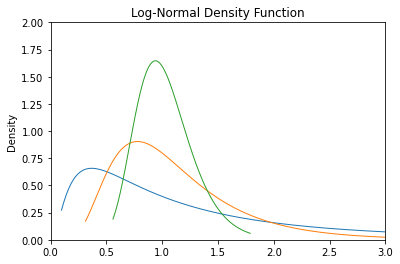

In [14]:
##
## Log-Normal Distribution

from scipy.stats import lognorm

def lnorm( s, num = 1000 ):
    min = lognorm.ppf( 0.01, s )  ## 1th percentile
    max = lognorm.ppf( 0.99, s )  ## 99th percentile
    x = np.linspace( min, max, num )
    plt.plot(x, lognorm.pdf( x, s ), lw = 1, label = 'lognorm pdf' )
##
lnorm( 1 )
lnorm( 0.5 )
lnorm( 0.25 )
plt.xlim( [ 0, 3 ] )
plt.ylim( [ 0, 2 ] )
##
plt.title( 'Log-Normal Density Function' )
plt.ylabel( 'Density' )
plt.show()

What this is trying to illustrate is how we can inject a little or a lot of variance into our input functions.  

Now, let's go back to the previous example and modify it...so you don't have to scroll up here's the problem again:

Our company produces two products:
* X1 sells for $20
* X2 sells for $15

Three inputs are used:
* a (60 units _currently_ in stock)
* b (24 units _currently_ in stock)
* c (84 units _currently_ in stock)

Production equations:
* X1 = 5a + 3b + 12c
* X2 = 15a + 4b + 7c

> What is the profit maximizing amount of revenue and how much X1 and X2 will be produced?  

But here's the new requirement:

> The inputs above this are merely the MEAN that is available on hand, each with a stdev of 5 , 2, and 8 units respectively.  We can use the log-normal distribution to help us.  We still want to optimize for profit.

Let's look at the code to generate a simulation given the new requirements:  

,First Product,Second Product,Revenue
run number,,,
1,5.925926,1.555556,141.851852
2,8.037037,0.222222,164.074074
3,7.407407,0.444444,154.814815
4,5.962963,1.777778,145.925926
5,7.259259,0.555556,153.518519


Results:

Iterations: 100
Mean First Product: 6.0
Mean Second Product: 1.0
Mean Profit Maximizing Revenue: 143.0


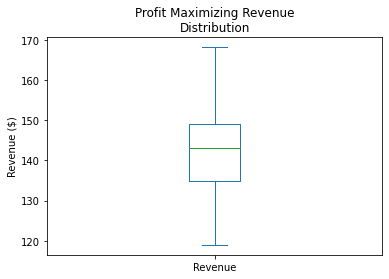

In [15]:
##
## Define a function
##
## this generates the "random variable"
def lrv( mu, sigma ):
    rv = math.log( np.random.lognormal( mean = mu, sigma = sigma, size = None ) )
    return( rv )
## this is the same set of constraints, give the random variable we generated
def lp_run( ):
    obj = [-20, -15]
    lhs_ineq = [ [ 5,  15 ], [ 3,  4 ], [ 12, 7 ] ]
    rhs_ineq = [ round( lrv( mu, sigma ), 0 ) for mu, sigma in [ [ 60, 5 ], [ 24, 2 ], [ 84, 8 ] ] ]
    bnd = [( 0, float( "inf" ) ), ( 0, float( "inf" ) ) ]
    opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd, method="revised simplex")
    Rev = 20 * opt.x[ 0 ] + 15 * opt.x[ 1 ]
    return( Rev, opt )    
##
## Define a run experiment function
## See Queueing example set-up for similar function
##
def run_experiments( n_runs ):
    df = pd.DataFrame( columns = [ 'First Product', 'Second Product', 'Revenue' ] )
    cols = list( df )
    for i in range( n_runs ):
        Rev, opt = lp_run( )
        data = { 'First Product':opt.x[ 0 ], 'Second Product':opt.x[ 1 ], 'Revenue':Rev }
        x = pd.DataFrame( data, index = [ 0 ] )
        frames = [ df, x ]
        df = pd.concat( frames )
    df[ 'run number' ] = range( 1, n_runs + 1 )
    return df
##
## Run the simulation experiment
##
n_runs = 100
experiments = run_experiments( n_runs )
experiments.set_index( 'run number', inplace = True )
display( experiments.head( ) )
##
## Display mean results
##
printbold( 'Results:\n' )
print( f"Iterations: {n_runs}" )
print( f"Mean First Product: {round( experiments[ 'First Product' ].mean(), 0 )}" )
print( f"Mean Second Product: {round( experiments[ 'Second Product' ].mean(), 0 )}" )
print( f"Mean Profit Maximizing Revenue: {round( experiments[ 'Revenue' ].mean(), 0 )}" )
##
ax = experiments.plot( y = 'Revenue', kind = 'box', grid = False,
                 title = 'Profit Maximizing Revenue\nDistribution' )
ax.set( ylabel = 'Revenue ($)' );

## What Else Can I do with Linear Programming?

Consider using this approach whenever:  

* Your problem can be expressed as "I want to minimize or maximize some objective"
* You can model your problem as a series of constraints 

Let's look at a few more examples.  You can write the code yourself.  

### Bin Packing, or, Supply Chain Optimization

Let's say we deliver packages of various weights and sizes via local vans.  Each package has a guaranteed delivery date, an insurance amount, "class", etc.  Let's call this _the package's value_.  But we can only fit so many packages on our van.  Which do we deliver NOW and WHY?

#### Packages to deliver 

We would read this from our SCM database in the real world...I simply hack it up here

|PackageId|Value|Weight|Area (cubic feet)|
|---|---|---|---|
|1 |120|12|22|
|2|79|8|16|
|3|55|6|11|
|4|34|3|10|
|Van Capacity||100|200|

We want to MAXIMIZE the total value we can ship given the capacity constraints.  

### _Optimization problems like this pop up everywhere in business_

* Given a series of investments with a fix amount of capital, what should we invest in?  ("Portfolio selection")
* How should we organize a cargo container?  
* Where should I deploy my associates in a retail store _right now_? 
* _the travelling salesman problem_ 

# Summary

* Thanks for coming out
* We are here to help
* Could you complete our survey?  

Hopefully, some things you learned:  

* Why data projects are risky and some approaches for risk mitigation using Prescriptive Analytics
* Prescriptive Analytics using 
  * a Data Lake and SQL
  * Jupyter
  * simulation
  * linear programming

_Even if none of this made sense or you think it's too complicated to implement at your company_...

* it's good to be exposed to the _Art of the Possible_
* by using data as a talking point (with Jupyter notebooks as an enabler) we can often use Design Thinking as a method to come to actionable, normative statements.
* _pro tip_:  I wrote none of this code.  You can find all of this in various gh repos and stackoverflow.  


# What is the future of analytics?

Maybe?:  

* behaviorial analytics
* causal inferencing

